In [91]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


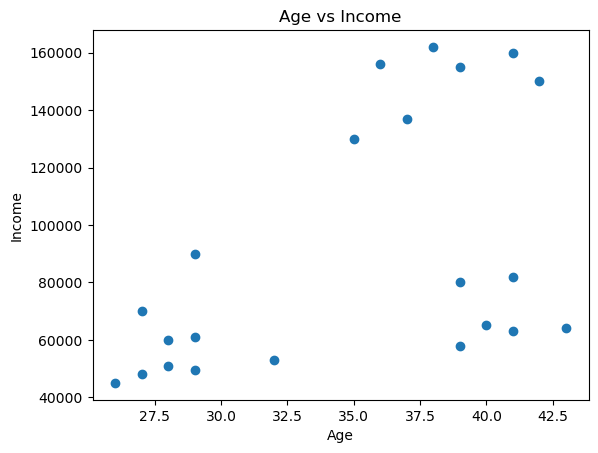

In [93]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')
plt.show()

In [94]:
km = KMeans(n_clusters=3)
km
#the above line creates an instance of KMeans with 3 clusters

KMeans(n_clusters=3)

In [95]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

c:\Users\Ayush Malik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [96]:
df['Cluster'] = y_predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


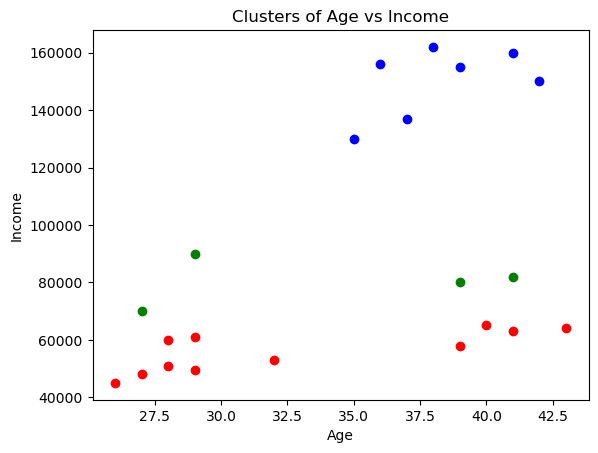

In [97]:
df1 = df[df['Cluster'] == 0]
df2 = df[df['Cluster'] == 1]
df3 = df[df['Cluster'] == 2]
plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')
plt.scatter(df3['Age'], df3['Income($)'], color='green')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clusters of Age vs Income')
plt.show()

In [98]:
#as we can see in this above scatter plot, the clusters are not well separated
#to solve this, we can scale the data using MinMaxScaler
scaler = MinMaxScaler()

In [99]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [100]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

c:\Users\Ayush Malik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [101]:
df['Cluster'] = y_predicted
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


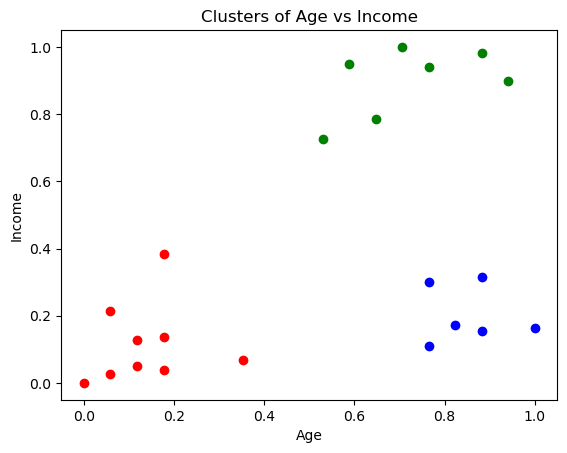

In [102]:
df1 = df[df['Cluster'] == 0]
df2 = df[df['Cluster'] == 1]
df3 = df[df['Cluster'] == 2]
plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')
plt.scatter(df3['Age'], df3['Income($)'], color='green')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clusters of Age vs Income')
plt.show()

In [103]:
#after scaling, the clusters are better separated
#we can also visualize the clusters using the cluster centers

In [104]:
km.cluster_centers_
#the above line gives the coordinates of the cluster centers

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

In [105]:
#the above one was easy for small datasets, but for large datasets, we can use the elbow method to find the optimal number of clusters

Elbow Plot

In [106]:
sse = []
k_rng = range(1,15) #the range of k is always from 1 to n-1, where n is the number of data points
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)#.inertia_ gives the sum of squared distances of samples to their closest cluster center

sse

c:\Users\Ayush Malik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ayush Malik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ayush Malik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ayush Malik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.4231300670650922,
 0.2818479744366238,
 0.22395807059250128,
 0.22072860953949588,
 0.14247582522543337,
 0.10740235405674733,
 0.11054495257686343,
 0.06667741899198737,
 0.0568298846268858,
 0.03975856337558939,
 0.04145997219667109]

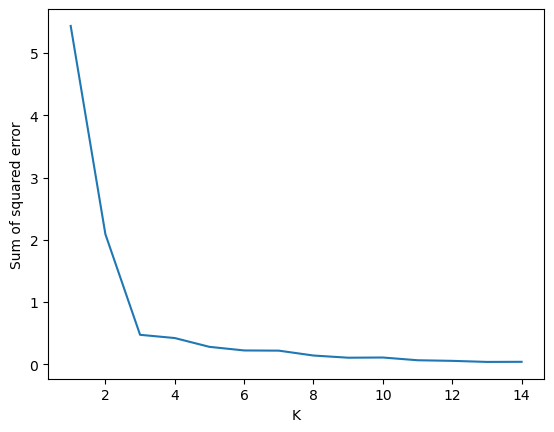

In [107]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()